<a href="https://colab.research.google.com/github/ValGArens/EstudioIngresoAnual/blob/main/CcsDatosEconm%C3%ADa_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

## Instalación e importación de bibliotecas

In [1]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

import numpy as np # manejo numérico
import matplotlib.pyplot as plt # graficos
import seaborn as sns # graficos
from sklearn.model_selection import train_test_split # Separar el set de datos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Importar métricas de rendimientos


## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

## Creación de data frame para guardar base de datos

In [2]:
# Guarda como dataframe
df = adult.data.original

## Exploración de base de datos

Se utilizarán los siguientes comandos para estudiar la base de datos y eliminar valores NaN que entorpecen el estudio de ingresos del Censo

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Cambiar tipo de datos en ingresos.

Se realizará un reemplazo del valor del ingreso cuando este supere o no el valor de 50K

In [7]:
df["income"]

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [8]:
df["income"]= df["income"].apply(lambda x: 0 if x == ">50K." and ">50K" else 1)

In [9]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [10]:
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,1
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,1
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,1
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,0


## Visualización de información de variables

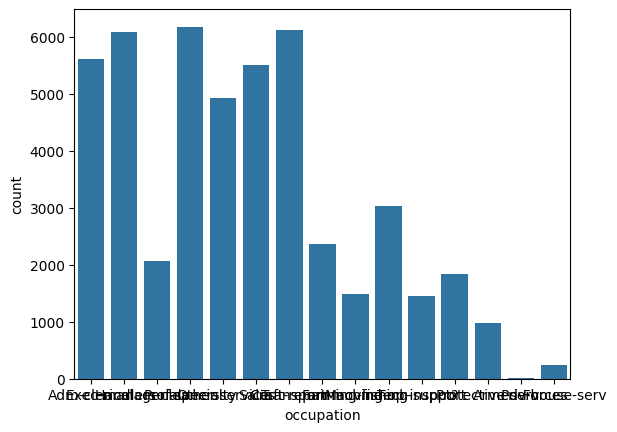

In [11]:
# Crear histograma de clasificación por ocupación
# ajustar tamaño de gráfico

sns.countplot(x="occupation", data=df)
plt.show()

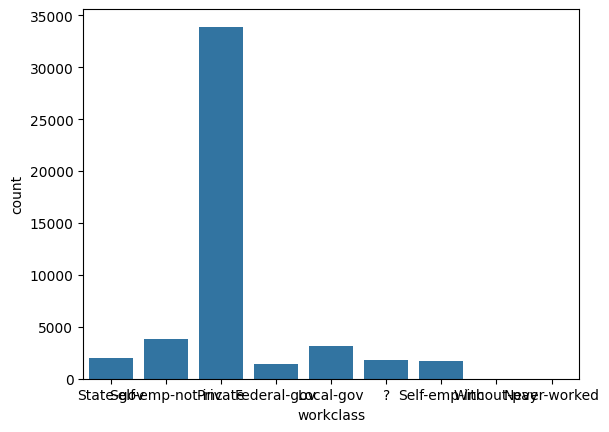

In [12]:
# Creación de histograma por workclass (tipo de trabajo)

sns.countplot(x="workclass", data=df)
plt.show()

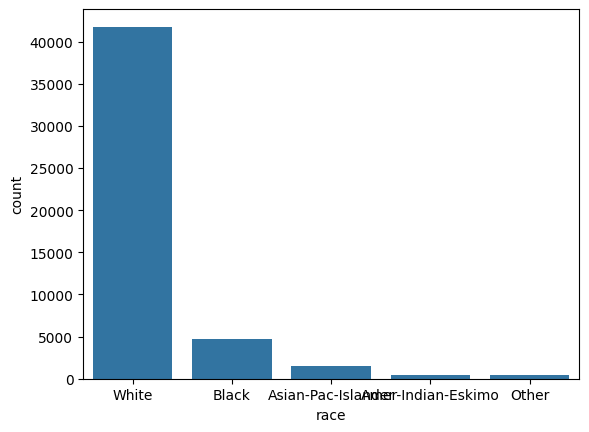

In [13]:
# Creación de histograma por race (tipo de raza)

sns.countplot(x="race", data=df)
plt.show()

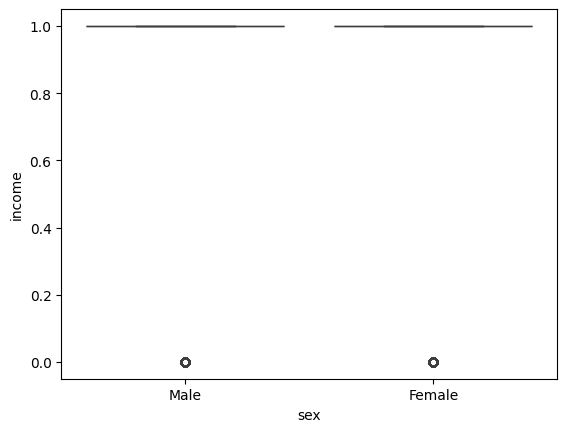

In [14]:
# Creación de boxplot entre ingreso y sexo (income vs sex)

sns.boxplot(x="sex", y="income", data=df)
plt.show()






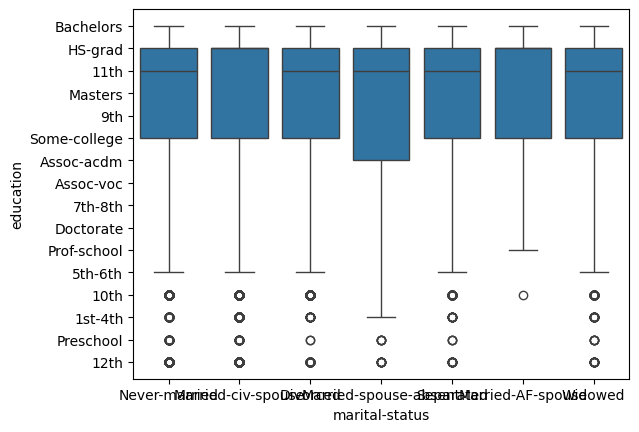

In [15]:
# Creación de boxplot entre variables de ocupación y sexo

sns.boxplot(y="education",x = "marital-status", data=df)
plt.show()

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

## Instalación de lazypredict

In [16]:
#Intalación
!pip install lazypredict

## Importar bibliotecas

In [17]:
#Importando las bibliotecas
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

## Construcción y evaluación de modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

In [18]:
dfnuevo = df.dropna()

X = dfnuevo.drop("income", axis=1)
y = dfnuevo["income"]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create transformers for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns as is
)

# Apply preprocessing to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)